<a href="https://colab.research.google.com/github/BANZOM/Stock_Market_Price_Prediction_by_LSTM/blob/main/stocks_market_prediction_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# downloading and importing libraries 

!pip install -q yfinance #Download market data from Yahoo! Finance's API
!pip install fix_yahoo_finance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
# fundamental libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
import datetime as dt

In [121]:
# The tech stocks we'll use for this analysis 
# Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Start and end time for the data to be extracted 
# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)

start = datetime.today()-dt.timedelta(365)
end = datetime.today()

# start = '2010-01-01'
# end = '2016-12-31'


# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [122]:
# DataFrame of the company 
# print("Apple: \n",AAPL)
# print("\nGoogle: \n",GOOG)
# print("\nMicrosoft: \n",MSFT)
# print("\nAmazon: \n",AMZN)

In [123]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-15,142.800003,143.759995,141.490005,143.179993,143.179993,39014600,AMAZON
2022-08-16,143.910004,146.570007,142.000000,144.779999,144.779999,59102900,AMAZON
2022-08-17,142.690002,143.380005,140.779999,142.100006,142.100006,48149800,AMAZON
2022-08-18,141.320007,142.770004,140.380005,142.300003,142.300003,37458700,AMAZON
2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47727300,AMAZON
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,AMAZON
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,AMAZON
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,AMAZON
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,AMAZON


In [124]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,157.993028,160.007650,156.179083,158.180797,157.684123,8.824087e+07
std,12.690973,12.690269,12.562582,12.613367,12.582540,2.645012e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.174995,149.434998,146.480003,148.294998,147.783257,6.946830e+07
50%,158.820007,161.020004,155.979996,158.520004,158.067886,8.250750e+07
75%,169.385002,171.065002,167.300003,169.060005,168.770226,1.003336e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [125]:
# General info
# AAPL.info()

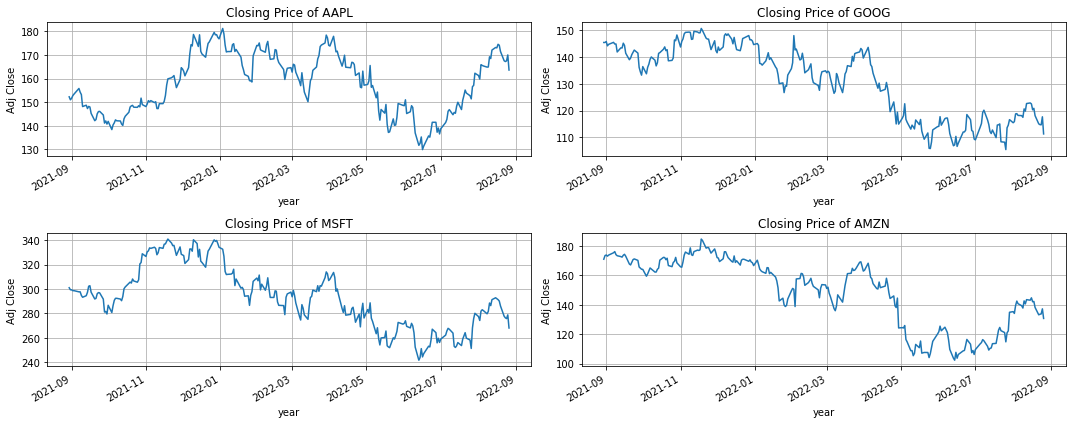

In [126]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.grid()
    plt.ylabel('Adj Close')
    plt.xlabel('year')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


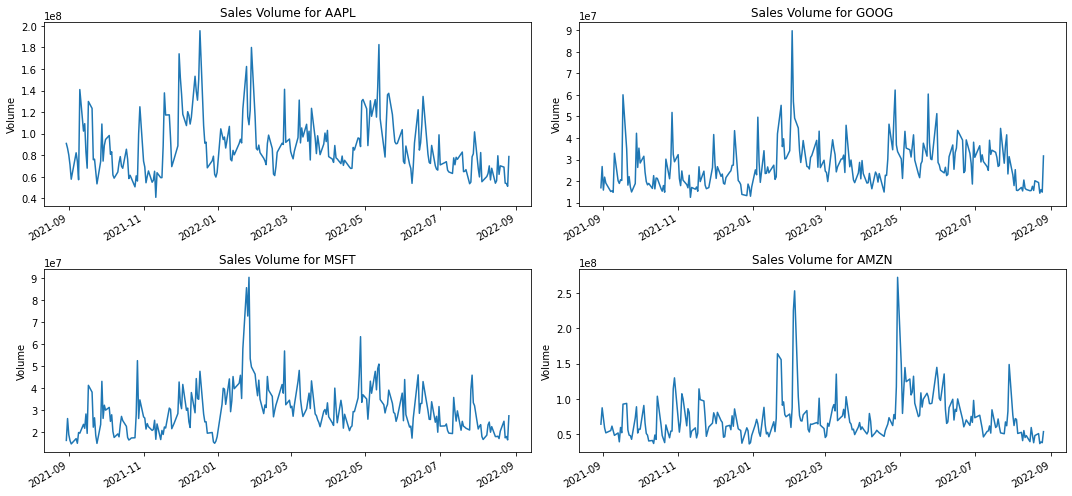

In [127]:
# Now lets plot the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

# The below function is used to fit the above given functions in the given region
plt.tight_layout()

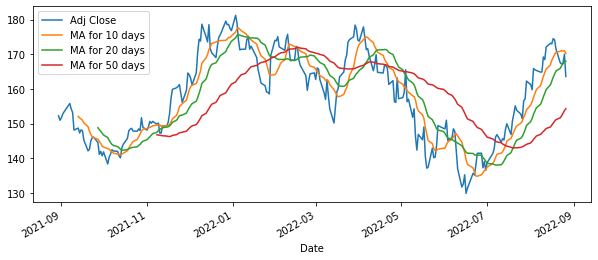

In [128]:
# for plotting rolling averages

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()


AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

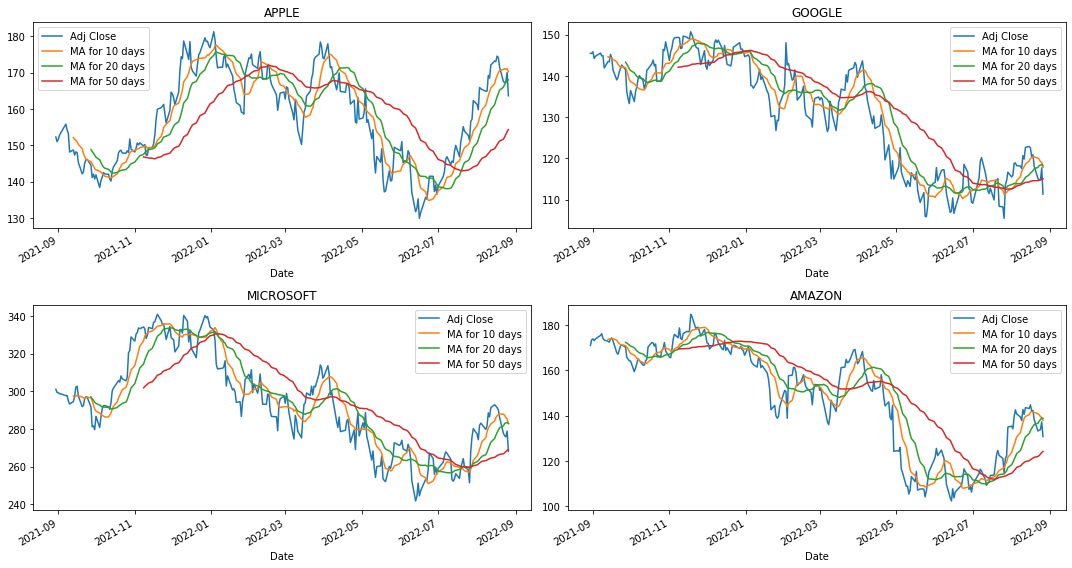

In [129]:
#Let's assume it as a coordinate axes

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

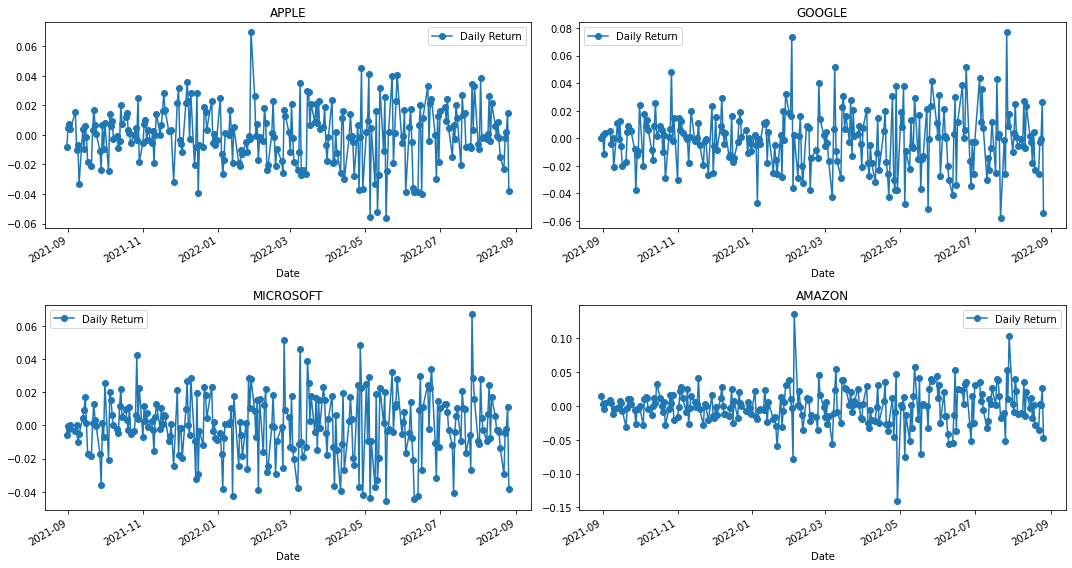

In [130]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

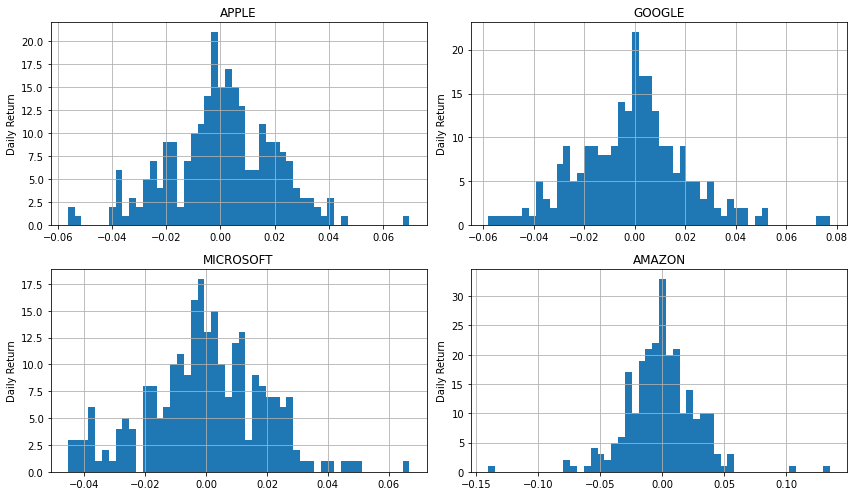

In [131]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [132]:
# Grab all the closing prices for the tech stock list into one DataFrame

# closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# # Let's take a quick look
# closing_df.head() 

In [133]:
# Grab all the closing prices for the tech stock list into one DataFrame

start = dt.datetime.today()-dt.timedelta(365)
end = dt.datetime.today()
#interval='1d'
closing_df = yf.download(tech_list, start=start, end=end,)['Adj Close']

# Let's take a quick look
closing_df.tail() 

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-22,167.570007,133.220001,115.070000,277.750000
2022-08-23,167.229996,133.619995,114.769997,276.440002
2022-08-24,167.529999,133.800003,114.699997,275.790009
2022-08-25,170.029999,137.279999,117.699997,278.850006
2022-08-26,163.619995,130.750000,111.300003,268.089996


In [134]:
# Daily return
# Percentage change between the current and a prior element.: pct_change()

tech_return = closing_df.pct_change()
tech_return.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-22,-0.023029,-0.036244,-0.025821,-0.029355
2022-08-23,-0.002029,0.003003,-0.002607,-0.004716
2022-08-24,0.001794,0.001347,-0.000610,-0.002351
2022-08-25,0.014923,0.026009,0.026155,0.011095
2022-08-26,-0.037699,-0.047567,-0.054375,-0.038587


In [135]:
''' comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. '''

" comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. "

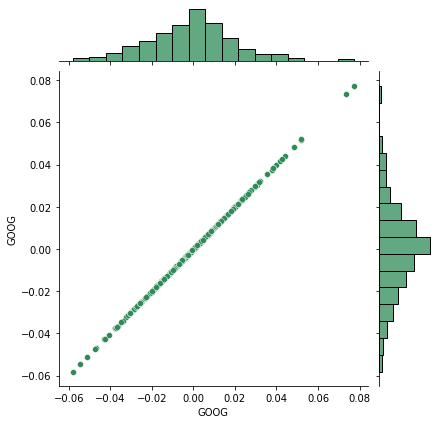

In [136]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOG', y='GOOG', data=tech_return, kind='scatter', color='seagreen') 

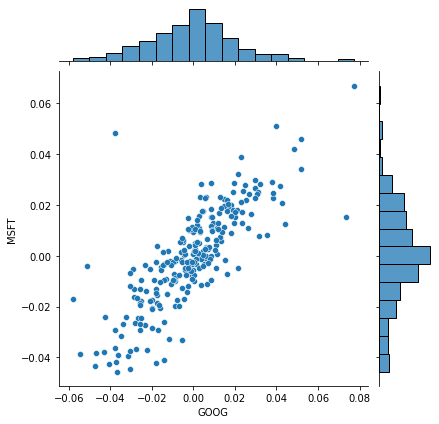

In [137]:
# Comparing Google with Microsoft 
# we will use joinplot to compare the daily returns
 
sns.jointplot(x='GOOG', y='MSFT', data=tech_return, kind='scatter')

In [138]:
''' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.
    
'''

' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.\n    \n'

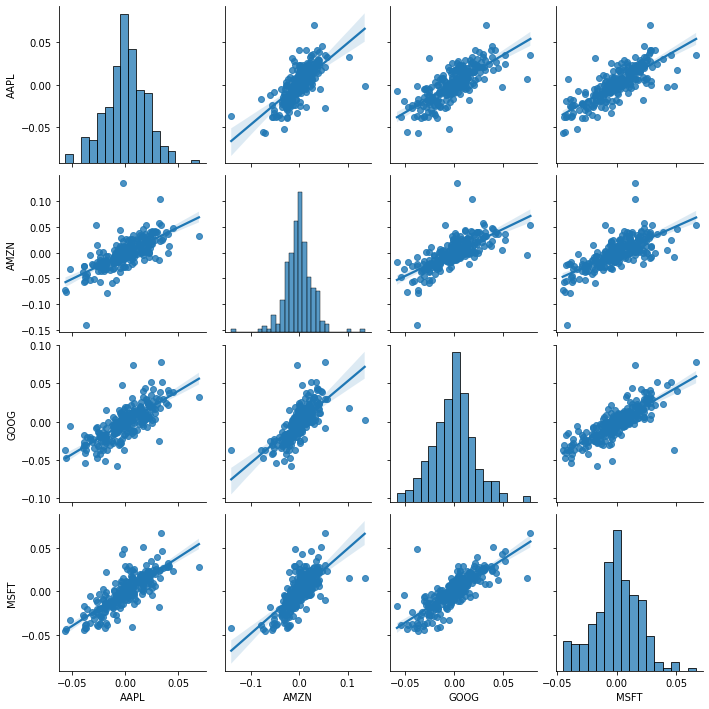

In [139]:
#repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot
# kind = 'reg', IS FOR THE LINE DIFFERENTIATING THE DATA
# kernel density estimate (KDE)
# reg: to get that line

sns.pairplot(tech_return, kind='reg')

In [140]:
'''we can also use sns.PairGrid() for full control of the figure,
   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 
   Below is an example of utilizing the full power of seaborn to achieve this result.'''

'we can also use sns.PairGrid() for full control of the figure,\n   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. \n   Below is an example of utilizing the full power of seaborn to achieve this result.'

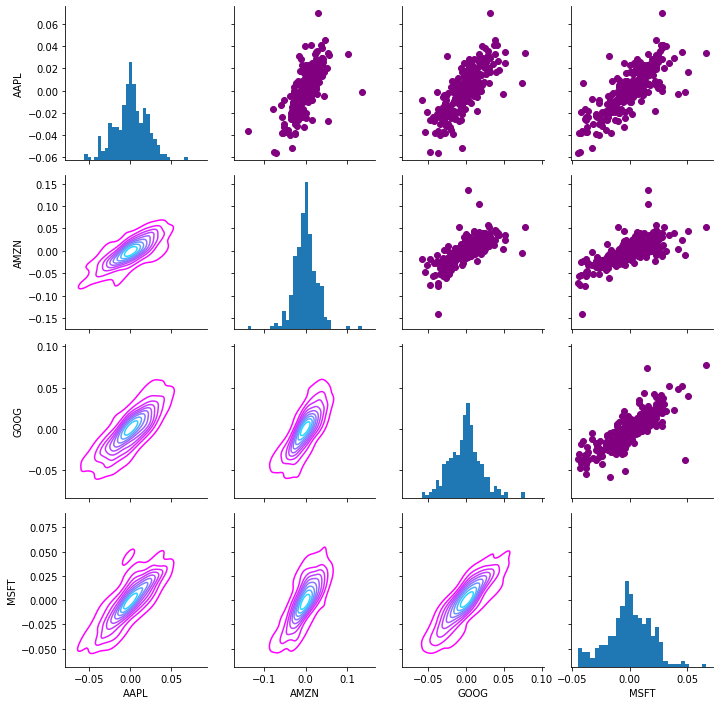

In [141]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_return.dropna())

# The dropna() method removes all the rows that contains NULL values.

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [142]:
''' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'''

' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'

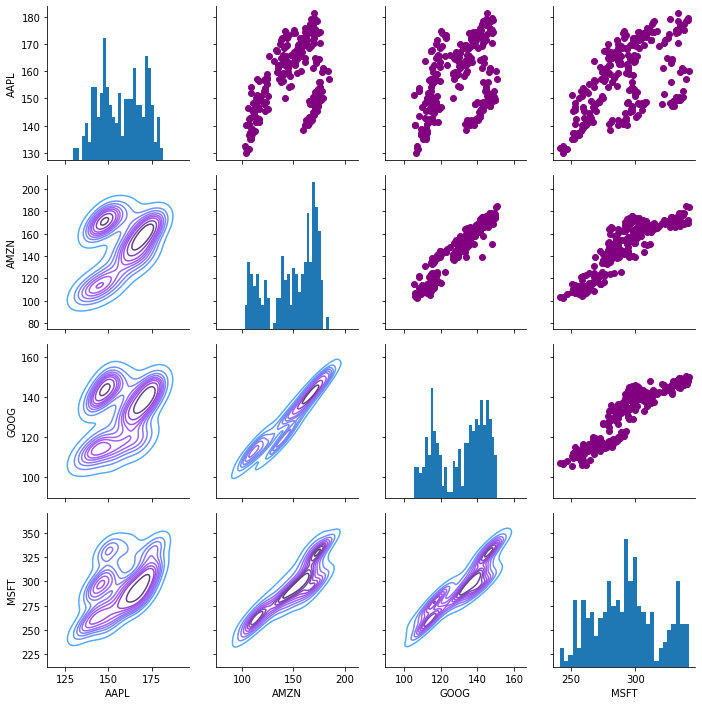

In [143]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [144]:
'''

We completed the pair plot,
Now we use seabron for a quick correlation plot for the daily returns; By comparing the closing prices, we can see the relationship between the companies.

'''

'\n  \nWe completed the pair plot,\nNow we use sebron for a quick correlation plot for the daily returns\n\n'

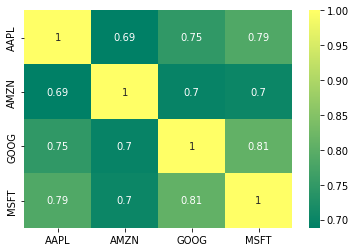

In [145]:
# corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.
# here we use heatmap bcz it provides an excellent visual tool for comparing various entities.
# cmap – a matplotlib colormap name or object. This maps the data values to the color space.

# tech return
sns.heatmap(tech_return.corr(), annot=True, cmap='summer')

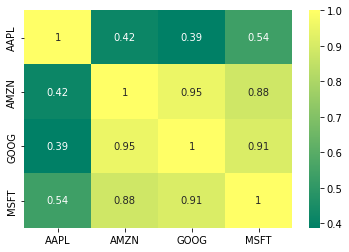

In [149]:
# closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [150]:
""" above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return."""

' above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.'

In [146]:
''' TEMP0RARY BY ADITYA '''
# from pandas_datareader import data


# closing_df = data.DataReader(tech_list,'google', start, end)['Adj Close']
# closing_df.head()


' TEMP0RARY BY ADITYA '

In [147]:
''' TEMP0RARY BY ADITYA '''

# import pandas_datareader.data as pdr

# for stocks in tech_list:
#     try:
#         closing_df = pdr.DataReader(stocks,'google', start, end)['Adj Close']
#         print(closing_df.head())
#     except:
#         print("Did not find: "+stocks)



' TEMP0RARY BY ADITYA '